In [1]:
import os
import sys
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

In [2]:
from pyspark import SparkContext
sc = SparkContext(master="local[4]")
sc.version

'2.3.0'

In [3]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import Row, StructField, StructType, StringType, IntegerType, BinaryType

sqlContext = SQLContext(sc)
sqlContext

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("CSV Reader").getOrCreate()
df1 = spark.read.format("csv").option("header", "true").option("inferSchema", "true").option("escape", "\"").load("merged_data.csv")

In [5]:
df2 = df1.dropna("any")
df2.show()

+---+--------------------+----+--------+--------------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+
|_c0|               title|rank|    date|              artist|                 url|   region| chart|        trend|streams|            track_id|               album|popularity|duration_ms|explicit|release_date|   available_markets|af_danceability|af_energy|af_key|af_loudness|af_mode|af_speechiness|af_acousticness|af_instrumentalness|af_liveness|af_valence|af_tempo|af_time_signature|
+---+--------------------+----+--------+--------------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---

In [6]:
df2 = df2.withColumn("streams", df1["streams"].cast("Integer"))

In [7]:
df2 = df2.withColumn("popularity", df1["popularity"].cast("Integer"))

In [8]:
df2 = df2.withColumn("duration_ms", df1["duration_ms"].cast("Integer"))

In [9]:
#pre processing code 

In [10]:
df2.show(3)

+---+--------------------+----+--------+------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+
|_c0|               title|rank|    date|      artist|                 url|   region| chart|        trend|streams|            track_id|               album|popularity|duration_ms|explicit|release_date|   available_markets|af_danceability|af_energy|af_key|af_loudness|af_mode|af_speechiness|af_acousticness|af_instrumentalness|af_liveness|af_valence|af_tempo|af_time_signature|
+---+--------------------+----+--------+------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---------------+---------+-

In [11]:
#create new column is_explict which returns 0, 1
#new column is_explicit is created to return a binary variable with indicates whether the music has swear words

In [12]:
from pyspark.sql.functions import when
from pyspark.sql.functions import lit

In [13]:
df3 = df2.withColumn("contains_cussing", \
               when((df2.explicit == True), lit(1))\
               .otherwise(lit(0)))

In [14]:
df3.show()

+---+--------------------+----+--------+--------------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+----------------+
|_c0|               title|rank|    date|              artist|                 url|   region| chart|        trend|streams|            track_id|               album|popularity|duration_ms|explicit|release_date|   available_markets|af_danceability|af_energy|af_key|af_loudness|af_mode|af_speechiness|af_acousticness|af_instrumentalness|af_liveness|af_valence|af_tempo|af_time_signature|contains_cussing|
+---+--------------------+----+--------+--------------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+---

In [15]:
df3.select("contains_cussing").show()

+----------------+
|contains_cussing|
+----------------+
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
|               0|
+----------------+
only showing top 20 rows



In [16]:
#create a new column popularity increased to indicate whether the popularity of a song increased

In [17]:
df3 = df3.withColumn("popularity_increased", \
                    when((df3.trend == "MOVE_UP"), lit(1))\
                    .otherwise(lit(0)))

In [18]:
df3.select("popularity_increased").show()

+--------------------+
|popularity_increased|
+--------------------+
|                   0|
|                   1|
|                   0|
|                   0|
|                   1|
|                   0|
|                   0|
|                   0|
|                   1|
|                   0|
|                   0|
|                   1|
|                   1|
|                   0|
|                   0|
|                   1|
|                   1|
|                   0|
|                   0|
|                   0|
+--------------------+
only showing top 20 rows



In [19]:
#create a new column popularity decreased to indicate whether the popularity of a song decreased 
#returns 0, 1 

In [20]:
df3 = df3.withColumn("popularity_decreased", \
                    when((df3.trend == "MOVE_DOWN"), lit(1))\
                    .otherwise(lit(0)))

In [21]:
df3.select("popularity_decreased").show()

+--------------------+
|popularity_decreased|
+--------------------+
|                   0|
|                   0|
|                   1|
|                   0|
|                   0|
|                   1|
|                   1|
|                   1|
|                   0|
|                   1|
|                   0|
|                   0|
|                   0|
|                   1|
|                   1|
|                   0|
|                   0|
|                   1|
|                   0|
|                   1|
+--------------------+
only showing top 20 rows



In [22]:
#create column sme popularity which return 0, 1 

In [23]:
df3 = df3.withColumn("populairty_same", \
                    when((df3.trend == "SAME_POSITION"), lit(1))\
                    .otherwise(lit(0)))

In [24]:
df3.select("populairty_same").show()

+---------------+
|populairty_same|
+---------------+
|              1|
|              0|
|              0|
|              1|
|              0|
|              0|
|              0|
|              0|
|              0|
|              0|
|              1|
|              0|
|              0|
|              0|
|              0|
|              0|
|              0|
|              0|
|              1|
|              0|
+---------------+
only showing top 20 rows



In [25]:
#create a column new entry for songs that are a new entry into the popularity list 

In [26]:
df3 = df3.withColumn("new_entry", \
                    when((df3.trend == "NEW_ENTRY"), lit(1))\
                    .otherwise(lit(0))) 

In [27]:
df3.select("new_entry").show()

+---------+
|new_entry|
+---------+
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
|        0|
+---------+
only showing top 20 rows



In [28]:
#standardization or normalization? 

In [29]:
#check is the column of af_acousticness follows a gaussian distribution 
#the af acousticness column does not follow a gaussian distribution 

In [30]:
pandas_df = df3.limit(1000).toPandas()

In [31]:
import matplotlib.pyplot as plt 

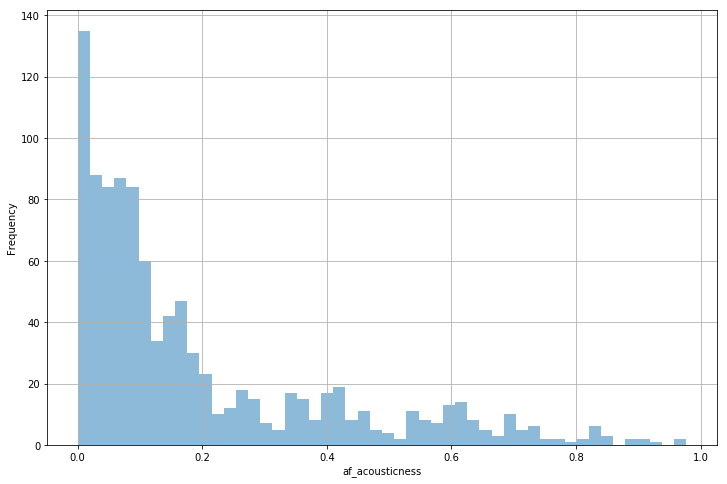

In [32]:
plt.figure(figsize=(12, 8))
plt.hist(pandas_df["af_acousticness"], bins=50, alpha=0.5)
plt.xlabel("af_acousticness")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [33]:
#normalize the af acousticness column 

In [34]:
#normalize af acousticness 

In [35]:
from pyspark.sql.functions import col, min, max

In [36]:
af_acousticness_min = df3.select(min(col("af_acousticness"))).collect()[0][0]

In [37]:
af_acousticness_max = df3.select(max(col("af_acousticness"))).collect()[0][0]

In [38]:
df3_normalized = df3.withColumn("af_acousticness_normalized", (col("af_acousticness") - af_acousticness_min) / (af_acousticness_max - af_acousticness_min))

In [39]:
df3_normalized.select("af_acousticness_normalized").show()

+--------------------------+
|af_acousticness_normalized|
+--------------------------+
|       0.18850086573348634|
|      0.004335925560629973|
|       0.40322051244002977|
|        0.5554396047061708|
|       0.07660471181599192|
|       0.14313756009125886|
|       0.08577818029030902|
|       0.05634243529579697|
|       0.19958967377936418|
|       0.10059686013343667|
|       0.02458812134623775|
|        0.1723716903940277|
|       0.13305682550409723|
|       0.06783447272516127|
|        0.5514073108713061|
|       0.11793572362335474|
|       0.08648383171141034|
|       0.07902408811691071|
|        0.1270083847518002|
|        0.2580579343849018|
+--------------------------+
only showing top 20 rows



In [40]:
#normalize af lousness

In [41]:
af_loudness_min = df3.select(min(col("af_loudness"))).collect()[0][0]

In [42]:
af_loudness_max = df3.select(max(col("af_loudness"))).collect()[0][0]

In [43]:
df3_normalized = df3.withColumn("af_loudness_normalized", (col("af_loudness") - af_loudness_min) / (af_loudness_max - af_loudness_min))

In [44]:
df3_normalized.select("af_loudness_normalized").show()

+----------------------+
|af_loudness_normalized|
+----------------------+
|    0.8639058707873798|
|    0.8286074160548063|
|    0.8592362753832448|
|    0.8196675985376793|
|    0.8237534945162974|
|    0.8020951737273817|
|    0.7334029676507634|
|    0.7868575466191514|
|    0.8876839421215938|
|    0.7483641055574329|
|    0.8976375533777764|
|    0.9309391416546342|
|    0.7728487604067464|
|    0.8302356302417745|
|    0.8360419034745477|
|    0.8475008448281159|
|    0.8536757703296365|
|    0.7905440693066265|
|    0.8250744984793095|
|    0.8545666799791096|
+----------------------+
only showing top 20 rows



In [45]:
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation
import pyspark.sql.functions as f
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [46]:
df3_normalized.show()

+---+--------------------+----+--------+--------------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+----------------+--------------------+--------------------+---------------+---------+----------------------+
|_c0|               title|rank|    date|              artist|                 url|   region| chart|        trend|streams|            track_id|               album|popularity|duration_ms|explicit|release_date|   available_markets|af_danceability|af_energy|af_key|af_loudness|af_mode|af_speechiness|af_acousticness|af_instrumentalness|af_liveness|af_valence|af_tempo|af_time_signature|contains_cussing|popularity_increased|popularity_decreased|populairty_same|new_entry|af_loudness_normalized|
+---+-----------

In [57]:
#run a random forest classification model to determine the accuracy of whether a song contains profanity based on input variables

In [47]:
classification = df3_normalized.select("af_danceability", "af_energy", "af_loudness", "af_speechiness", "af_acousticness", "af_liveness", "af_valence", "af_tempo", "contains_cussing")

In [48]:
classification.show()

+---------------+---------+-----------+--------------+---------------+-----------+----------+--------+----------------+
|af_danceability|af_energy|af_loudness|af_speechiness|af_acousticness|af_liveness|af_valence|af_tempo|contains_cussing|
+---------------+---------+-----------+--------------+---------------+-----------+----------+--------+----------------+
|          0.852|    0.773|     -2.921|        0.0776|          0.187|      0.159|     0.907| 102.034|               0|
|          0.663|     0.92|      -4.07|         0.226|        0.00431|      0.101|     0.533|  99.935|               0|
|          0.761|    0.838|     -3.073|        0.0502|            0.4|      0.176|      0.71|  93.974|               0|
|          0.508|    0.687|     -4.361|         0.326|          0.551|      0.126|     0.555| 180.044|               0|
|          0.899|    0.626|     -4.228|         0.292|          0.076|     0.0631|     0.873|  88.007|               0|
|          0.776|    0.669|     -4.933| 

In [49]:
required_features = ["af_danceability", "af_energy", "af_loudness", "af_speechiness", "af_acousticness", "af_liveness", "af_valence", "af_tempo"]

In [50]:
from pyspark.ml.feature import VectorAssembler

In [51]:
assembler = VectorAssembler(inputCols=required_features, outputCol="features")

In [52]:
transformed_data = assembler.transform(classification) 

In [53]:
transformed_data.show()

+---------------+---------+-----------+--------------+---------------+-----------+----------+--------+----------------+--------------------+
|af_danceability|af_energy|af_loudness|af_speechiness|af_acousticness|af_liveness|af_valence|af_tempo|contains_cussing|            features|
+---------------+---------+-----------+--------------+---------------+-----------+----------+--------+----------------+--------------------+
|          0.852|    0.773|     -2.921|        0.0776|          0.187|      0.159|     0.907| 102.034|               0|[0.852,0.773,-2.9...|
|          0.663|     0.92|      -4.07|         0.226|        0.00431|      0.101|     0.533|  99.935|               0|[0.663,0.92,-4.07...|
|          0.761|    0.838|     -3.073|        0.0502|            0.4|      0.176|      0.71|  93.974|               0|[0.761,0.838,-3.0...|
|          0.508|    0.687|     -4.361|         0.326|          0.551|      0.126|     0.555| 180.044|               0|[0.508,0.687,-4.3...|
|          0.

In [54]:
(training_data, test_data) = transformed_data.randomSplit([0.75, 0.25])

In [55]:
training_data

DataFrame[af_danceability: double, af_energy: double, af_loudness: double, af_speechiness: double, af_acousticness: double, af_liveness: double, af_valence: double, af_tempo: double, contains_cussing: int, features: vector]

In [56]:
test_data

DataFrame[af_danceability: double, af_energy: double, af_loudness: double, af_speechiness: double, af_acousticness: double, af_liveness: double, af_valence: double, af_tempo: double, contains_cussing: int, features: vector]

In [57]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="contains_cussing", featuresCol="features", maxDepth=5)

In [58]:
model = rf.fit(training_data)

In [59]:
rf_predictions = model.transform(test_data)

In [60]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator 
multi_evaluator = MulticlassClassificationEvaluator(labelCol="contains_cussing", metricName="accuracy")
print("Random Forest classifier Accuracy:", multi_evaluator.evaluate(rf_predictions))

Random Forest classifier Accuracy: 0.8302329160216894


In [ ]:
#the random forest accuracy classifier for contain cussing returns with an accuracy of 83.0% 

In [73]:
#run a random classification model to determine the accuracy of whether the song increased in popularity 

In [61]:
df3_normalized.show()

+---+--------------------+----+--------+--------------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+----------------+--------------------+--------------------+---------------+---------+----------------------+
|_c0|               title|rank|    date|              artist|                 url|   region| chart|        trend|streams|            track_id|               album|popularity|duration_ms|explicit|release_date|   available_markets|af_danceability|af_energy|af_key|af_loudness|af_mode|af_speechiness|af_acousticness|af_instrumentalness|af_liveness|af_valence|af_tempo|af_time_signature|contains_cussing|popularity_increased|popularity_decreased|populairty_same|new_entry|af_loudness_normalized|
+---+-----------

In [62]:
classification1 = df3_normalized.select("af_danceability", "af_energy", "af_loudness", "af_speechiness", "af_acousticness", "af_liveness", "af_valence", "af_tempo", "popularity_increased")

In [63]:
required_features = ["af_danceability", "af_energy", "af_loudness", "af_speechiness", "af_acousticness", "af_liveness", "af_valence", "af_tempo"]

In [64]:
from pyspark.ml.feature import VectorAssembler 

In [65]:
assembler = VectorAssembler(inputCols=required_features, outputCol="features")

In [66]:
transformed_data = assembler.transform(classification1)

In [67]:
(training_data, test_data) = transformed_data.randomSplit([0.75, 0.25])

In [68]:
from pyspark.ml.classification import RandomForestClassifier 
rf = RandomForestClassifier(labelCol="popularity_increased", featuresCol="features", maxDepth=5)

In [69]:
model = rf.fit(training_data)

In [70]:
rf_predictions = model.transform(test_data)

In [71]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
multi_evaluator = MulticlassClassificationEvaluator(labelCol="popularity_increased", metricName="accuracy")
print("Random Forest Classifier Accuracy:", multi_evaluator.evaluate(rf_predictions))

Random Forest Classifier Accuracy: 0.6153685443983704


In [72]:
#the random forest classifier to predict whether the song's popularity increased returned an accuracy score of 61.5%

In [73]:
#run a classification model for popularity decreased 

In [74]:
classification2 = df3_normalized.select("af_danceability", "af_energy", "af_loudness", "af_speechiness", "af_acousticness", "af_liveness", "af_valence", "af_tempo", "popularity_decreased")

In [75]:
required_features = ["af_danceability", "af_energy", "af_loudness", "af_speechiness", "af_acousticness", "af_liveness", "af_valence", "af_tempo"]

In [76]:
from pyspark.ml.feature import VectorAssembler 
assembler = VectorAssembler(inputCols=required_features, outputCol="features")
transformed_data = assembler.transform(classification2)

In [77]:
(training_data, test_data) = transformed_data.randomSplit([0.75, 0.25]) 

In [78]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="popularity_decreased", featuresCol="features", maxDepth=5)

In [79]:
model = rf.fit(training_data)

In [80]:
rf_predictions = model.transform(test_data) 

In [81]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
multi_evaluator = MulticlassClassificationEvaluator(labelCol="popularity_decreased", metricName="accuracy")
print("Random Forest classifier Accuracy:", multi_evaluator.evaluate(rf_predictions))

Random Forest classifier Accuracy: 0.5590233005829686


In [82]:
#the accuracy score for whether a song's popularity decreased is 55.9% 

In [83]:
#run a classification to predict if the populairty for the song remains the same 

In [84]:
classification3 = df3_normalized.select("af_danceability", "af_energy", "af_loudness", "af_speechiness", "af_acousticness", "af_liveness", "af_valence", "af_tempo", "populairty_same")

In [85]:
required_features = ["af_danceability", "af_energy", "af_loudness", "af_speechiness", "af_acousticness", "af_liveness", "af_valence", "af_tempo"]

In [86]:
from pyspark.ml.feature import VectorAssembler 
assembler = VectorAssembler(inputCols=required_features, outputCol="features")
transformed_data = assembler.transform(classification3)

In [87]:
(training_data, test_data) = transformed_data.randomSplit([0.75, 0.25])

In [88]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="populairty_same", featuresCol="features", maxDepth=5)

In [89]:
model = rf.fit(training_data)

In [90]:
rf_predictions = model.transform(test_data)

In [91]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
multi_evaluator = MulticlassClassificationEvaluator(labelCol="populairty_same", metricName="accuracy")
print("Random Forest classifier Accuracy:", multi_evaluator.evaluate(rf_predictions))

Random Forest classifier Accuracy: 0.8846118924612074


In [92]:
#the random forest classifier for whether the same popularity remains the same is 88.4% 

In [93]:
#run a random forest classification model to predict whether the song is a new entry in the popularity

In [94]:
classification4 = df3_normalized.select("af_danceability", "af_energy", "af_loudness", "af_speechiness", "af_acousticness", "af_liveness", "af_valence", "af_tempo", "new_entry")

In [95]:
required_features = ["af_danceability", "af_energy", "af_loudness", "af_speechiness", "af_acousticness", "af_liveness", "af_valence", "af_tempo"]

In [96]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(classification4)

In [97]:
(training_data, test_data) = transformed_data.randomSplit([0.75, 0.25])

In [98]:
from pyspark.ml.classification import RandomForestClassifier 
rf = RandomForestClassifier(labelCol="new_entry", featuresCol="features", maxDepth=5) 

In [99]:
model = rf.fit(training_data)

In [100]:
rf_predictions = model.transform(test_data)

In [101]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

multi_evaluator = MulticlassClassificationEvaluator(labelCol="new_entry", metricName="accuracy")
print("Random Forest Classifier Accuracy:", multi_evaluator.evaluate(rf_predictions))

Random Forest Classifier Accuracy: 0.9395274802737795


In [102]:
#the random forets classifier has an accuracy of 94.0% for whether a song is a new entry in the charts 

In [103]:
#k-means cluster af_danceability and af_popularity 

In [104]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StandardScaler 
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
cluster1 = df3_normalized.select("af_energy", "af_danceability") 

In [106]:
required_features = ["af_energy", "af_danceability"]

In [107]:
assemble = VectorAssembler(inputCols=required_features, outputCol="features")

In [108]:
data_df = assemble.transform(cluster1)

In [109]:
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data_df)
data_df = scaler_model.transform(data_df)

In [110]:
wssse_values = []
evaluator = ClusteringEvaluator()

In [111]:
for i in range(2,10):    
    KMeans_mod = KMeans(featuresCol='scaled_features', k=i)  
    KMeans_fit = KMeans_mod.fit(data_df)  
    output = KMeans_fit.transform(data_df)   
    score = evaluator.evaluate(output)   
    wssse_values.append(score)  
    print("Silhouette Score:",score)

Silhouette Score: 0.5539238689394224
Silhouette Score: 0.5226857085803746
Silhouette Score: 0.5227221373874527
Silhouette Score: 0.44184235840599373
Silhouette Score: 0.4311151927175161
Silhouette Score: 0.48312820957335306
Silhouette Score: 0.47560642776873924
Silhouette Score: 0.4893289244891712


In [112]:
#cchoose k = 4 

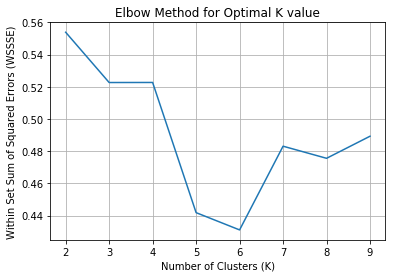

In [114]:
plt.plot(range(2, 10), wssse_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within Set Sum of Squared Errors (WSSSE)")
plt.title("Elbow Method for Optimal K value")
plt.grid()
plt.show()

In [115]:
kmeans = KMeans(k=6, featuresCol="scaled_features", predictionCol="clutser")
kmeans_model = kmeans.fit(data_df) 

In [116]:
clustered_data = kmeans_model.transform(data_df)

In [117]:
clustered_data.show()

+---------+---------------+-------------+--------------------+-------+
|af_energy|af_danceability|     features|     scaled_features|clutser|
+---------+---------------+-------------+--------------------+-------+
|    0.773|          0.852|[0.773,0.852]|[4.78036366795495...|      1|
|     0.92|          0.663| [0.92,0.663]|[5.68943670700977...|      4|
|    0.838|          0.761|[0.838,0.761]|[5.18233473964586...|      4|
|    0.687|          0.508|[0.687,0.508]|[4.24852501925621...|      2|
|    0.626|          0.899|[0.626,0.899]|[3.87129062890012...|      1|
|    0.669|          0.776|[0.669,0.776]|[4.13720995324949...|      1|
|    0.682|          0.588|[0.682,0.588]|[4.21760416758768...|      2|
|    0.772|          0.832|[0.772,0.832]|[4.77417949762124...|      1|
|    0.964|          0.736|[0.964,0.736]|[5.96154020169285...|      4|
|    0.687|          0.721|[0.687,0.721]|[4.24852501925621...|      1|
|    0.954|           0.68| [0.954,0.68]|[5.89969849835578...|      4|
|    0

In [118]:
clustering_data_pd = clustered_data.toPandas()

In [119]:
clustering_data_pd

,af_energy,af_danceability,features,scaled_features,clutser
0,0.773,0.852,"[0.773, 0.852]","[4.780363667954952, 6.526005291630331]",1
1,0.920,0.663,"[0.92, 0.663]","[5.689436707009775, 5.078335103698251]",4
2,0.838,0.761,"[0.838, 0.761]","[5.18233473964586, 5.828978904848219]",4
3,0.687,0.508,"[0.687, 0.508]","[4.2485250192562125, 3.8910923569814653]",2
4,0.626,0.899,"[0.626, 0.899]","[3.8712906289001294, 6.886007930957357]",1
5,0.669,0.776,"[0.669, 0.776]","[4.137209953249499, 5.943873364207907]",1
6,0.682,0.588,"[0.682, 0.588]","[4.217604167587681, 4.5038628068998054]",2
7,0.772,0.832,"[0.772, 0.832]","[4.774179497621246, 6.372812679150746]",1
8,0.964,0.736,"[0.964, 0.736]","[5.96154020169285, 5.637488139248736]",4
9,0.687,0.721,"[0.687, 0.721]","[4.2485250192562125, 5.522593679889048]",1


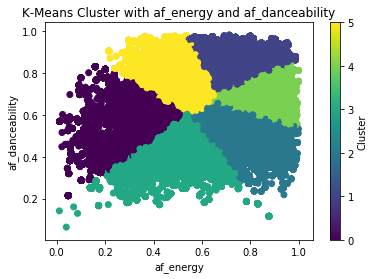

In [120]:
plt.scatter(clustering_data_pd["af_energy"], clustering_data_pd["af_danceability"], c=clustering_data_pd["clutser"])
plt.xlabel("af_energy")
plt.ylabel("af_danceability")
plt.title("K-Means Cluster with af_energy and af_danceability")
plt.colorbar().set_label("Cluster")
plt.show()

In [130]:
#cluster 0: this returns data points where the energy is between 0.0 and 1.5 and the danceability is between 0.2 and 0.8
#cluster 1: this returns data points where the energy is between 0.6 and 1.0 and the danceability is between 0.7 and 1.0 
#cluster 2: this returns data points where the energy is between 0.6 and 1.0 and the danceability is between 0.2 and 0.65
#cluster 3: this returns data points where the energy is between 0.2 and 0.8 and the danceability is between 0.2 and 0.6
#cluster 4: this returns data points where the energy is between 0.6 and 1.0 and the danceability is between 0.6 and 0.8
#cluster 5: this returns data points where the energy is between 0.2 and 0.65 and the danceability is between 0.6 and 1.0

In [121]:
#cluster 

In [122]:
cluster2 = df3_normalized.select("af_energy", "af_speechiness") 

In [123]:
required_features = ["af_energy", "af_speechiness"]

In [124]:
assembler = VectorAssembler(inputCols=required_features, outputCol="features")

In [125]:
data_df = assembler.transform(cluster2) 

In [126]:
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data_df)
data_df = scaler_model.transform(data_df) 

In [127]:
wssee_values = []
evaluator = ClusteringEvaluator()

In [128]:
for i in range(2, 10):
    KMeans_mod = KMeans(featuresCol='scaled_features', k=i)
    KMeans_fit = KMeans_mod.fit(data_df)
    output = KMeans_fit.transform(data_df)
    score = evaluator.evaluate(output)
    wssee_values.append(score)
    print("Silhouette Score:", score)

Silhouette Score: 0.6063734501401855
Silhouette Score: 0.6259412465089856
Silhouette Score: 0.503823104183681
Silhouette Score: 0.5533285053482256
Silhouette Score: 0.5521582406131621
Silhouette Score: 0.5461034727702523
Silhouette Score: 0.5210875348895873
Silhouette Score: 0.5276416828560014


In [139]:
#return 4 values 

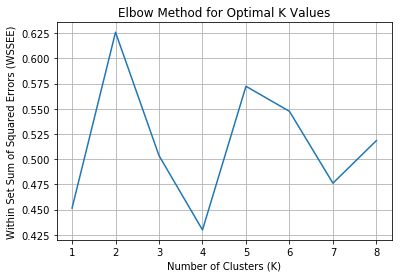

In [140]:
plt.plot(range(2, 10), wssee_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within Set Sum of Squared Errors (WSSEE)")
plt.title("Elbow Method for Optimal K Values")
plt.grid()
plt.show()

In [129]:
kmeans = KMeans(k=4, featuresCol="scaled_features", predictionCol="cluster")
kmeans_model = kmeans.fit(data_df) 

In [130]:
clustered_data = kmeans_model.transform(data_df)

In [131]:
clustered_data.show()

+---------+--------------+--------------+--------------------+-------+
|af_energy|af_speechiness|      features|     scaled_features|cluster|
+---------+--------------+--------------+--------------------+-------+
|    0.773|        0.0776|[0.773,0.0776]|[4.78036366795495...|      0|
|     0.92|         0.226|  [0.92,0.226]|[5.68943670700977...|      3|
|    0.838|        0.0502|[0.838,0.0502]|[5.18233473964586...|      0|
|    0.687|         0.326| [0.687,0.326]|[4.24852501925621...|      2|
|    0.626|         0.292| [0.626,0.292]|[3.87129062890012...|      2|
|    0.669|        0.0638|[0.669,0.0638]|[4.13720995324949...|      0|
|    0.682|         0.173| [0.682,0.173]|[4.21760416758768...|      3|
|    0.772|           0.1|   [0.772,0.1]|[4.77417949762124...|      0|
|    0.964|         0.129| [0.964,0.129]|[5.96154020169285...|      0|
|    0.687|        0.0782|[0.687,0.0782]|[4.24852501925621...|      0|
|    0.954|         0.119| [0.954,0.119]|[5.89969849835578...|      0|
|    0

In [132]:
clustered_data_pd = clustered_data.toPandas()

In [133]:
clustered_data_pd

,af_energy,af_speechiness,features,scaled_features,cluster
0,0.773,0.0776,"[0.773, 0.0776]","[4.780363667954952, 0.8358339676098487]",0
1,0.920,0.2260,"[0.92, 0.226]","[5.689436707009775, 2.434258720100848]",3
2,0.838,0.0502,"[0.838, 0.0502]","[5.18233473964586, 0.5407070254383299]",0
3,0.687,0.3260,"[0.687, 0.326]","[4.2485250192562125, 3.5113643484640553]",2
4,0.626,0.2920,"[0.626, 0.292]","[3.8712906289001294, 3.1451484348205643]",2
5,0.669,0.0638,"[0.669, 0.0638]","[4.137209953249499, 0.6871933908957261]",0
6,0.682,0.1730,"[0.682, 0.173]","[4.217604167587681, 1.863392737068348]",3
7,0.772,0.1000,"[0.772, 0.1]","[4.774179497621246, 1.077105628363207]",0
8,0.964,0.1290,"[0.964, 0.129]","[5.96154020169285, 1.389466260588537]",0
9,0.687,0.0782,"[0.687, 0.0782]","[4.2485250192562125, 0.8422966013800279]",0


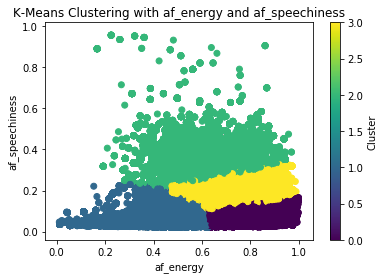

In [134]:
plt.scatter(clustered_data_pd["af_energy"], clustered_data_pd["af_speechiness"], c=clustered_data_pd["cluster"], cmap="viridis")
plt.xlabel("af_energy")
plt.ylabel("af_speechiness")
plt.title("K-Means Clustering with af_energy and af_speechiness")
plt.colorbar().set_label("Cluster")
plt.show()

In [135]:
#cluster 0: the af energy is between 0.6 and 1.0 and the af_speechinness is between 0.0 and 0.15
#cluster 1: the af energy is between 0.0 and 0.6 and the af_speechiness is between 0.0 and 0.2 
#cluster 2: the af energy is between 0.2 and 1.0 and the af_speechiness is between 0.2 and 1.0
#cluster 3: the af energy is between 0.5 and 1.0 and the af_speechiness is between 0.15 and 0.25 

In [136]:
cluster3 = df3_normalized.select("af_energy", "af_liveness") 

In [137]:
required_features = ["af_energy", "af_liveness"]

In [138]:
assembler = VectorAssembler(inputCols=required_features, outputCol="features")
data_df = assembler.transform(cluster3)

In [139]:
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data_df)
data_df = scaler_model.transform(data_df)

In [140]:
wssee_values = []
evaluator = ClusteringEvaluator() 

In [141]:
for i in range(2, 10):
    KMeans_mod = KMeans(featuresCol="scaled_features", k=i)
    KMeans_fit = KMeans_mod.fit(data_df)
    output = KMeans_fit.transform(data_df)
    score = evaluator.evaluate(output)
    wssee_values.append(score)
    print("Silhouette Score:", score)

Silhouette Score: 0.5588134174092381
Silhouette Score: 0.608477494235477
Silhouette Score: 0.6010636097947389
Silhouette Score: 0.5859801304687939
Silhouette Score: 0.6109337753106497
Silhouette Score: 0.604963197850112
Silhouette Score: 0.5828367210361902
Silhouette Score: 0.552968258892427


In [142]:
#choose two clusters 

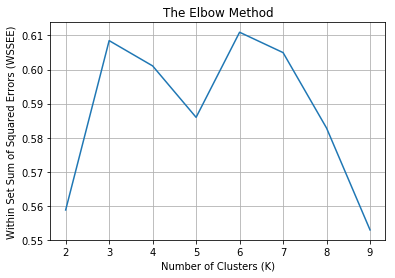

In [143]:
plt.plot(range(2, 10), wssee_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within Set Sum of Squared Errors (WSSEE)")
plt.title("The Elbow Method")
plt.grid()
plt.show() 

In [148]:
kmeans = KMeans(k=5, featuresCol="scaled_features", predictionCol="cluster")
kmeans_model = kmeans.fit(data_df)

In [149]:
clustered_data = kmeans_model.transform(data_df)

In [150]:
clustered_data_pd = clustered_data.toPandas()

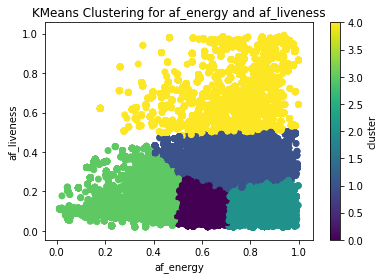

In [151]:
plt.scatter(clustered_data_pd["af_energy"], clustered_data_pd["af_liveness"], c=clustered_data_pd["cluster"], cmap="viridis")
plt.title("KMeans Clustering for af_energy and af_liveness")
plt.xlabel("af_energy")
plt.ylabel("af_liveness")
plt.colorbar().set_label("cluster")
plt.show()

In [160]:
#cluster 0: the af energy is between 0.5 and 0.7 and the af liveness is between 0.0 and 0.3
#cluster 1: the af energy is betwen 0.4 and 1.0 and the af liveness is between 0.4 and 1.0
#cluster 2: the af energy is between 0.7 and 1.0 and the af liveness is between 0.0 and 0.2
#cluster 3: the af energy is between 0.0 and 0.5 and the af liveness is between 0.0 and 0.4
#cluster 4: the af energy is between 0.4 and 1.0 and the af liveness is between 0.2 and 1.0

In [152]:
#kmeans cluster with af energy and af acousticness

In [161]:
cluster4 = df3_normalized.select("popularity", "af_energy")

In [162]:
required_features = ["popularity", "af_energy"]

In [163]:
assembler = VectorAssembler(inputCols=required_features, outputCol="features")
data_df = assembler.transform(cluster4)

In [164]:
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data_df)
data_df = scaler_model.transform(data_df)

In [165]:
wssee_values = []
evaluator = ClusteringEvaluator() 

In [166]:
for i in range(2, 10):
    KMeans_mod = KMeans(featuresCol="scaled_features", k=i)
    KMeans_fit = KMeans_mod.fit(data_df)
    output = KMeans_fit.transform(data_df)
    score = evaluator.evaluate(output)
    wssee_values.append(score)
    print("Silhouette Score:", score)

Silhouette Score: 0.8975317962701697
Silhouette Score: 0.4081324975749436
Silhouette Score: 0.033161588412886196
Silhouette Score: -0.006701030910086592
Silhouette Score: -0.06694478483364841
Silhouette Score: -0.0643320456586524
Silhouette Score: -0.09882487981817237
Silhouette Score: -0.11120156565098935


In [167]:
#four clusters

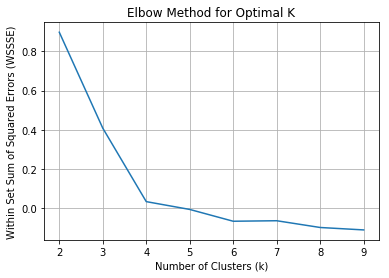

In [168]:
plt.plot(range(2, 10), wssee_values)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within Set Sum of Squared Errors (WSSSE)")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

In [169]:
kmeans = KMeans(k=6, featuresCol="scaled_features", predictionCol="cluster")
kmeans_model = kmeans.fit(data_df)

In [170]:
clustered_data = kmeans_model.transform(data_df)

In [171]:
clustered_data_pd = clustered_data.toPandas()

In [172]:
clustered_data_pd

,popularity,af_energy,features,scaled_features,cluster
0,78,0.773,"[78.0, 0.773]","[2.3767357295398015, 4.780363667954952]",2
1,72,0.920,"[72.0, 0.92]","[2.193909904190586, 5.689436707009775]",2
2,73,0.838,"[73.0, 0.838]","[2.224380875082122, 5.18233473964586]",2
3,0,0.687,"[0.0, 0.687]","[0.0, 4.2485250192562125]",5
4,0,0.626,"[0.0, 0.626]","[0.0, 3.8712906289001294]",5
5,0,0.669,"[0.0, 0.669]","[0.0, 4.137209953249499]",5
6,56,0.682,"[56.0, 0.682]","[1.7063743699260114, 4.217604167587681]",4
7,74,0.772,"[74.0, 0.772]","[2.2548518459736577, 4.774179497621246]",2
8,59,0.964,"[59.0, 0.964]","[1.7977872826006192, 5.96154020169285]",2
9,0,0.687,"[0.0, 0.687]","[0.0, 4.2485250192562125]",5


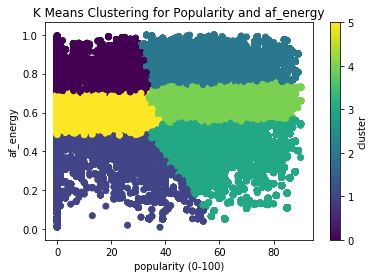

In [173]:
plt.scatter(clustered_data_pd["popularity"], clustered_data_pd["af_energy"], c=clustered_data_pd["cluster"], cmap="viridis")
plt.xlabel("popularity (0-100)")
plt.ylabel("af_energy")
plt.title("K Means Clustering for Popularity and af_energy")
plt.colorbar().set_label("cluster")
plt.show()

In [174]:
#cluster 0: popularity is between 0 and 40 and the af energy is between 0.8 and 1
#cluster 1: popularity is between 0 and 50 and the af energy is between 0.0 and 0.5 
#cluster 2: popularity is between 40 and 100 and the af energy is between 0.7 and 1.0
#cluster 3: popularity is between 40 and 100 and the af energy is between 0.0 and 0.5
#cluster 4: popularity is between 40 and 100 and the af energy is between 0.5 and 0.7
#cluster 5: popularity is between 0 and 50 and the af energy is between 0.5 and .07

In [175]:
cluster5 = df3_normalized.select("popularity", "af_danceability")

In [176]:
required_features = ["popularity", "af_danceability"] 

In [178]:
assembler = VectorAssembler(inputCols=required_features, outputCol="features")
data_df = assembler.transform(cluster5) 

In [179]:
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data_df)
data_df = scaler_model.transform(data_df) 

In [180]:
wssse_values = []
evaluator = ClusteringEvaluator() 

In [181]:
for i in range(2, 10):
    KMeans_mod = KMeans(featuresCol="scaled_features", k=i)
    KMeans_fit = KMeans_mod.fit(data_df)
    output = KMeans_fit.transform(data_df)
    score = evaluator.evaluate(output)
    wssse_values.append(score)
    print("Silhouette Score:", score)

Silhouette Score: 0.8969666359211727
Silhouette Score: 0.5123654388443374
Silhouette Score: 0.01090929875687362
Silhouette Score: -0.006492566026767273
Silhouette Score: -0.054542292022237156
Silhouette Score: -0.050968679289066066
Silhouette Score: -0.08993644434720745
Silhouette Score: -0.11642413562176539


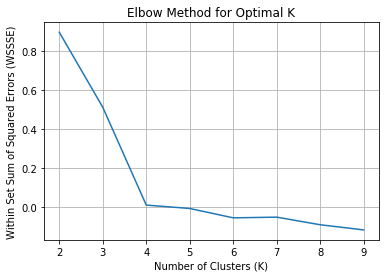

In [182]:
plt.plot(range(2, 10), wssse_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within Set Sum of Squared Errors (WSSSE)")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

In [183]:
kmeans = KMeans(k=4, featuresCol="scaled_features", predictionCol="cluster")
kmeans_model = kmeans.fit(data_df)

In [184]:
clustered_data = kmeans_model.transform(data_df)

In [185]:
clustered_data_pd = clustered_data.toPandas()

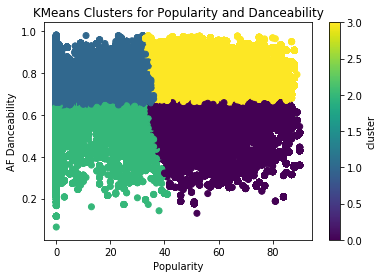

In [186]:
plt.scatter(clustered_data_pd["popularity"], clustered_data_pd["af_danceability"], c=clustered_data_pd["cluster"], cmap="viridis")
plt.xlabel("Popularity")
plt.ylabel("AF Danceability")
plt.title("KMeans Clusters for Popularity and Danceability")
plt.colorbar().set_label("cluster")
plt.show()

In [187]:
#cluster 0: the song has a popularity score 40 and 100 and af danceability between 0.2 and 0.6
#cluster 1: the song has a popularity score between 0 and 40 and af danceability between 0.6 and 1
#cluster 2: the song has a popularity score between 0 and 40 and af danceability between 0.2 and 0.6
#cluster 3: the song has a popularity score between 40 and 100 and af danceability between 0.6 and 1.0 

In [188]:
cluster6 = df3_normalized.select("popularity", "af_liveness")

In [189]:
required_features = ["popularity", "af_liveness"]

In [192]:
assembler = VectorAssembler(inputCols=required_features, outputCol="features")
data_df = assembler.transform(cluster6)

In [193]:
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data_df)
data_df = scaler_model.transform(data_df)

In [194]:
wssse_values = []
evaluator = ClusteringEvaluator()

In [195]:
for i in range(2,10):    
    KMeans_mod = KMeans(featuresCol='scaled_features', k=i)  
    KMeans_fit = KMeans_mod.fit(data_df)  
    output = KMeans_fit.transform(data_df)   
    score = evaluator.evaluate(output)   
    wssse_values.append(score)  
    print("Silhouette Score:",score)

Silhouette Score: 0.8946121885049896
Silhouette Score: 0.5977232181222237
Silhouette Score: 0.5418444672081254
Silhouette Score: 0.0326100281822227
Silhouette Score: 0.3737321705724417
Silhouette Score: -0.07731661292060264
Silhouette Score: 0.2818604858371249
Silhouette Score: 0.28413558041706277


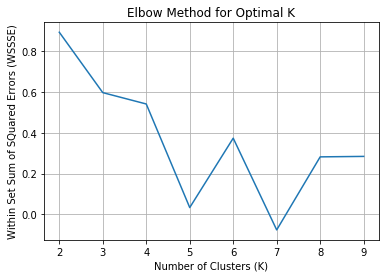

In [196]:
plt.plot(range(2, 10), wssse_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within Set Sum of SQuared Errors (WSSSE)")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

In [197]:
kmeans = KMeans(k=7, featuresCol="scaled_features", predictionCol="cluster")
kmeans_model = kmeans.fit(data_df)

In [198]:
clustered_data = kmeans_model.transform(data_df)

In [199]:
clustered_data_pd = clustered_data.toPandas()

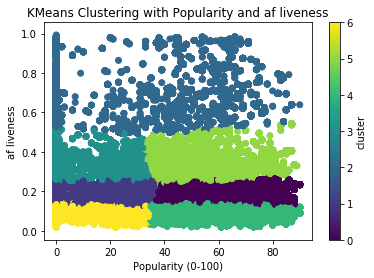

In [200]:
plt.scatter(clustered_data_pd["popularity"], clustered_data_pd["af_liveness"], c=clustered_data_pd["cluster"], cmap="viridis")
plt.xlabel("Popularity (0-100)")
plt.ylabel("af liveness")
plt.title("KMeans Clustering with Popularity and af liveness")
plt.colorbar().set_label("cluster")
plt.show()

In [201]:
#cluster 0: the popularity is between 40 and 100 and the af liveness is between 0.15 and 0.25
#cluster 1: the popularity is between 0 and roughly 40 and the af liveness is between 0.15 and 0.25
#cluster 2: the popularity is between 0 to 100 and the af liveness is between 0.5 and 1
#cluster 3: the popularity is between 0 and roughly 40 and the af liveness is between 0.25 and 0.50
#cluster 4: the popularity is between 40 and 100 and the af liveness is between 0 and 0.15 
#cluster 5: the popularity is between 40 to 100 and the af liveness are between 0.2 and 0.4  
#cluster 6: the popularity is between 0 and 35 and the liveness is between 0 and 0.15 

In [202]:
cluster7 = df3_normalized.select("popularity", "af_valence") 

In [203]:
required_features = ["popularity", "af_valence"]

In [208]:
assembler = VectorAssembler(inputCols=required_features, outputCol="features") 
data_df = assembler.transform(cluster7)

In [209]:
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data_df)
data_df = scaler_model.transform(data_df) 

In [210]:
wssse_values = []
evaluator = ClusteringEvaluator()

In [211]:
for i in range(2,10):    
    KMeans_mod = KMeans(featuresCol='scaled_features', k=i)  
    KMeans_fit = KMeans_mod.fit(data_df)  
    output = KMeans_fit.transform(data_df)   
    score = evaluator.evaluate(output)   
    wssse_values.append(score)  
    print("Silhouette Score:",score)

Silhouette Score: 0.018241200964418225
Silhouette Score: 0.35588284740447623
Silhouette Score: 0.29770343569476765
Silhouette Score: -0.04681210581061256
Silhouette Score: -0.07438963286739762
Silhouette Score: -0.09344698372376538
Silhouette Score: -0.10125313547318242
Silhouette Score: -0.15183495508209932


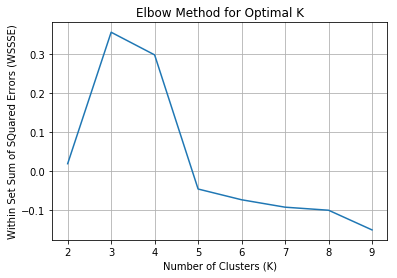

In [213]:
plt.plot(range(2, 10), wssse_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within Set Sum of SQuared Errors (WSSSE)")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

In [214]:
kmeans = KMeans(k=5, featuresCol="scaled_features", predictionCol="cluster")
kmeans_model = kmeans.fit(data_df)

In [215]:
clustered_data = kmeans_model.transform(data_df)

In [216]:
clustered_data_pd = clustered_data.toPandas()

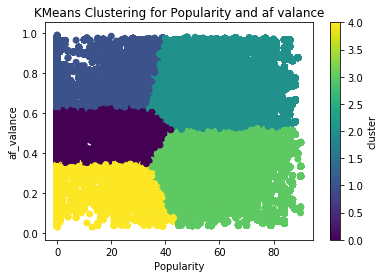

In [217]:
plt.scatter(clustered_data_pd["popularity"], clustered_data_pd["af_valence"], c=clustered_data_pd["cluster"], cmap="viridis")
plt.xlabel("Popularity")
plt.ylabel("af_valance")
plt.title("KMeans Clustering for Popularity and af valance")
plt.colorbar().set_label("cluster")
plt.show()

In [218]:
#cluster 0: the popularity is between 0 and 40 and the af valance is between 0.4 and 0.6 
#cluster 1: the popularity is between 0 and 40 and the af valance is between 0.6 and 1.0 
#cluster 2: the popularity is between 40 and 100 and the af valance is between 0.5 and 1.0 
#cluster 3: the popularity is between 40 and 100 and the af valance is between 0.0 and 0.5 
#cluster 4: the popularity is between 0 and 40 and the af valance is between 0.0 and roughly 0.4 

In [219]:
cluster8 = df3_normalized.select("popularity", "af_tempo") 

In [220]:
required_features = ["popularity", "af_tempo"] 

In [222]:
assembler = VectorAssembler(inputCols=required_features, outputCol="features")
data_df = assembler.transform(cluster8) 

In [223]:
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(data_df)
data_df = scaler_model.transform(data_df) 

In [224]:
wssse_values = []
evaluator = ClusteringEvaluator() 

In [225]:
for i in range(2,10):    
    KMeans_mod = KMeans(featuresCol='scaled_features', k=i)  
    KMeans_fit = KMeans_mod.fit(data_df)  
    output = KMeans_fit.transform(data_df)   
    score = evaluator.evaluate(output)   
    wssse_values.append(score)  
    print("Silhouette Score:",score)

Silhouette Score: 0.6494753478310186
Silhouette Score: 0.6595550555257814
Silhouette Score: 0.6725019768300512
Silhouette Score: 0.6546999390292189
Silhouette Score: 0.6106262104243232
Silhouette Score: 0.6175965635054401
Silhouette Score: 0.5702470760129399
Silhouette Score: 0.6150270066668292


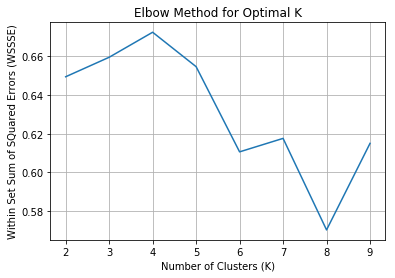

In [226]:
plt.plot(range(2, 10), wssse_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within Set Sum of SQuared Errors (WSSSE)")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

In [227]:
kmeans = KMeans(k=8, featuresCol='scaled_features', predictionCol="cluster")
kmeans_model = kmeans.fit(data_df)

In [228]:
clustered_data = kmeans_model.transform(data_df)

In [229]:
clustered_data_pd = clustered_data.toPandas()

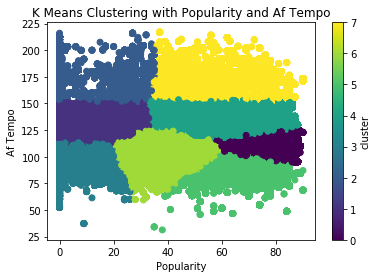

In [230]:
plt.scatter(clustered_data_pd["popularity"], clustered_data_pd["af_tempo"], c=clustered_data_pd["cluster"], cmap='viridis')
plt.xlabel("Popularity")
plt.ylabel("Af Tempo")
plt.title("K Means Clustering with Popularity and Af Tempo")
plt.colorbar().set_label("cluster")
plt.show()

In [232]:
#cluster 0: popularity is between 60 and 100 and the af tempo is between 100 and 125 
#cluster 1: popularity is between 0 and 35 and the af tempo is between 125 and 150 
#cluster 2: popularity is between 0 and 35 and the af tempo is between 150 and 200 
#cluster 3: popularity is between 0 and 25 and the af tempo is between 50 and 120 
#cluster 4: popularity is between 40 and 100 and the af tempo is between 125 and 150 
#cluster 5: popularity is between 40 and 100 and the af tempo is between 25 and 100 
#cluster 6: popularity is between 30 and 60 and the af tempo is between 70 and 125
#cluster 7: popularity is between 40 and 100 and the af tempp is between 150 and 200 

In [236]:
#multiple linear regression

In [247]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [240]:
mult1 = df3_normalized.select("rank", "popularity", "streams") 

In [241]:
assembler = VectorAssembler(inputCols=["rank", "popularity"], outputCol="features") 

In [243]:
data = assembler.transform(mult1)
final_data = data.select("features", "streams") 

In [245]:
train_data, test_data = final_data.randomSplit([0.75, 0.25], seed=42) 

In [248]:
lr = LinearRegression(featuresCol="features", labelCol="streams", predictionCol="predicted_streams")

In [249]:
lr_model = lr.fit(train_data)

In [250]:
predictions = lr_model.transform(test_data) 

In [251]:
evaluator = RegressionEvaluator(labelCol="streams", predictionCol="predicted_streams", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(rmse)) 

Root Mean Squared Error (RMSE) on test data: 201273.069


In [252]:
evaluator_r2 = RegressionEvaluator(labelCol="streams", predictionCol="predicted_streams", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print("R-squared (R2) on test data: {:.3f}".format(r2))

R-squared (R2) on test data: 0.017


In [253]:
#the model based on inputs of rank and popularity can only predict the number of streams with 1.7% accuracy

In [267]:
#return model for predicting rank by popularity and streams

In [254]:
mult2 = df3_normalized.select("popularity", "streams", "rank")  

In [255]:
assembler = VectorAssembler(inputCols=["popularity", "streams"], outputCol="features") 

In [256]:
data = assembler.transform(mult2) 

In [257]:
final_data = data.select("features", "rank") 

In [258]:
train_data, test_data = final_data.randomSplit([0.75, 0.25], seed=42) 

In [259]:
lr = LinearRegression(featuresCol="features", labelCol="rank", predictionCol="predicted_rank")
lr_model = lr.fit(train_data) 

In [260]:
predictions = lr_model.transform(test_data) 

In [261]:
evaluator = RegressionEvaluator(labelCol="rank", predictionCol="predicted_rank", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(rmse))

Root Mean Squared Error (RMSE) on test data: 57.020


In [262]:
evaluator_r2 = RegressionEvaluator(labelCol="rank", predictionCol="predicted_rank", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print("R-squared (R2) on test data: {:.3f}".format(r2))

R-squared (R2) on test data: 0.017


In [269]:
df3_normalized.show()

+---+--------------------+----+--------+--------------------+--------------------+---------+------+-------------+-------+--------------------+--------------------+----------+-----------+--------+------------+--------------------+---------------+---------+------+-----------+-------+--------------+---------------+-------------------+-----------+----------+--------+-----------------+----------------+--------------------+--------------------+---------------+---------+----------------------+
|_c0|               title|rank|    date|              artist|                 url|   region| chart|        trend|streams|            track_id|               album|popularity|duration_ms|explicit|release_date|   available_markets|af_danceability|af_energy|af_key|af_loudness|af_mode|af_speechiness|af_acousticness|af_instrumentalness|af_liveness|af_valence|af_tempo|af_time_signature|contains_cussing|popularity_increased|popularity_decreased|populairty_same|new_entry|af_loudness_normalized|
+---+-----------

In [276]:
mult3 = df3_normalized.select("streams", "duration_ms", "af_danceability", "af_energy",  "popularity")

In [278]:
assembler = VectorAssembler(inputCols=["streams", "duration_ms", "af_danceability", "af_energy"], outputCol="features")

In [279]:
data = assembler.transform(mult3) 

In [280]:
final_data = data.select("features", "popularity") 

In [281]:
train_data, test_data = final_data.randomSplit([0.75, 0.25], seed=42)

In [282]:
lr = LinearRegression(featuresCol="features", labelCol="popularity", predictionCol="predicted_popularity")
lr_model = lr.fit(train_data) 

In [283]:
predictions = lr_model.transform(test_data)

In [284]:
evaluator = RegressionEvaluator(labelCol="popularity", predictionCol="predicted_popularity", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(rmse))

Root Mean Squared Error (RMSE) on test data: 32.721


In [285]:
evaluator_r2 = RegressionEvaluator(labelCol="popularity", predictionCol="predicted_popularity", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print("R-squared (R2) on test data: {:.3f}".format(r2))

R-squared (R2) on test data: 0.006


In [288]:
mult4 = df3_normalized.select("streams", "popularity", "duration_ms", "af_danceability", "af_energy","rank")

In [289]:
assembler = VectorAssembler(inputCols=["streams", "popularity", "duration_ms", "af_danceability", "af_energy"], outputCol="features")

In [291]:
data = assembler.transform(mult4) 

In [292]:
final_data = data.select("features", "rank") 

In [293]:
train_data, test_data = final_data.randomSplit([0.75, 0.25], seed=42) 

In [294]:
lr = LinearRegression(featuresCol="features", labelCol="rank", predictionCol="predicted_rank")
lr_model = lr.fit(train_data) 

In [295]:
predictions = lr_model.transform(test_data)

In [297]:
evaluator = RegressionEvaluator(labelCol="rank", predictionCol="predicted_rank", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(rmse))

Root Mean Squared Error (RMSE) on test data: 56.713


In [298]:
evaluator_r2 = RegressionEvaluator(labelCol="rank", predictionCol="predicted_rank", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print("R-squared (R2) on test data: {:.3f}".format(r2))

R-squared (R2) on test data: 0.028


In [299]:
#the model returns a correalation of 2.8% 

In [300]:
#simple linear regression 

In [305]:
simple1 = df3_normalized.select("popularity", "streams") 

In [306]:
assembler = VectorAssembler(inputCols=["popularity"], outputCol="features") 

In [307]:
data = assembler.transform(simple1)

In [308]:
final_data = data.select("features", "streams") 

In [309]:
train_data, test_data = final_data.randomSplit([0.75, 0.25], seed=42) 

In [313]:
lr = LinearRegression(featuresCol="features", labelCol="streams", predictionCol="predicted_streams")
lr_model = lr.fit(train_data)

In [314]:
lr_model = lr.fit(train_data)

In [315]:
predictions = lr_model.transform(test_data) 

In [316]:
evaluator = RegressionEvaluator(labelCol="streams", predictionCol="predicted_streams", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(rmse))

Root Mean Squared Error (RMSE) on test data: 200091.238


In [317]:
evaluator = RegressionEvaluator(labelCol="streams", predictionCol="predicted_streams", metricName="r2")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(r2))

Root Mean Squared Error (RMSE) on test data: 0.028


In [318]:
#the model returns a correalation of 2.8% 

In [319]:
simple2 = df3_normalized.select("popularity", "rank")  

In [322]:
assembler = VectorAssembler(inputCols=["popularity"], outputCol="features") 

In [324]:
data = assembler.transform(simple2)

In [325]:
final_data= data.select("features", "rank") 

In [327]:
train_data, test_data = final_data.randomSplit([0.75, 0.25], seed=42) 

In [328]:
lr = LinearRegression(featuresCol="features", labelCol="rank", predictionCol="predicted_rank")
lr_model = lr.fit(train_data)

In [329]:
predictions = lr_model.transform(test_data)

In [330]:
evaluator = RegressionEvaluator(labelCol="rank", predictionCol="predicted_rank", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(rmse))

Root Mean Squared Error (RMSE) on test data: 57.447


In [331]:
evaluator = RegressionEvaluator(labelCol="rank", predictionCol="predicted_rank", metricName="r2")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(r2))

Root Mean Squared Error (RMSE) on test data: 0.028


In [332]:
simple3 = df3_normalized.select("popularity", "af_valence") 

In [333]:
assembler = VectorAssembler(inputCols=["popularity"], outputCol="features") 

In [334]:
data = assembler.transform(simple3)
final_data = data.select("features", "af_valence")

In [335]:
train_data, test_data = final_data.randomSplit([0.75, 0.25], seed=42) 

In [341]:
lr = LinearRegression(featuresCol="features", labelCol="af_valence", predictionCol="predicted_af_valence")
lr_model = lr.fit(train_data) 

In [342]:
predictions = lr_model.transform(test_data)

In [344]:
evaluator = RegressionEvaluator(labelCol="af_valence", predictionCol="predicted_af_valence", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(rmse))

Root Mean Squared Error (RMSE) on test data: 0.223


In [345]:
evaluator = RegressionEvaluator(labelCol="af_valence", predictionCol="predicted_af_valence", metricName="r2")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(r2))

Root Mean Squared Error (RMSE) on test data: 0.028


In [348]:
#the correlation between popularity and af valance is 2.8% 

In [350]:
simple4 = df3_normalized.select("streams", "af_valence") 

In [351]:
assembler = VectorAssembler(inputCols=["streams"], outputCol="features") 

In [352]:
data = assembler.transform(simple4)

In [354]:
final_data = data.select("features", "af_valence") 

In [355]:
train_data, test_data = final_data.randomSplit([0.75, 0.25], seed=42)

In [356]:
lr = LinearRegression(featuresCol="features", labelCol="af_valence", predictionCol="predicted_af_valence")

In [357]:
lr_model = lr.fit(train_data)

In [358]:
predictions = lr_model.transform(test_data) 

In [360]:
evaluator = RegressionEvaluator(labelCol="af_valence", predictionCol="predicted_af_valence", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(rmse))

Root Mean Squared Error (RMSE) on test data: 0.223


In [361]:
evaluator_r2 = RegressionEvaluator(labelCol="af_valence", predictionCol="predicted_af_valence", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print("R-squared (R2) on test data: {:.3f}".format(r2))

R-squared (R2) on test data: 0.000
